In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('forest_data_cleaned.csv')

In [ ]:
df.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [17]:
df.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [ ]:
df.drop('level_0',axis=1,inplace=True)

In [ ]:
df.drop('index',axis=1,inplace=True)


In [8]:
df.drop('day',axis=1,inplace=True)
df.drop('month',axis=1,inplace=True)
df.drop('year',axis=1,inplace=True)


In [10]:
y=df['Temperature']

In [18]:
X=df[[' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  ', 'Region']]
 

In [31]:
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,LassoCV,RidgeCV,Lasso

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [28]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



ValueError: could not convert string to float: 'not fire   '

In [27]:
df['Classes  '].value_counts()

Classes  
1    137
0    106
Name: count, dtype: int64

In [26]:
df['Classes  ']=np.where(df['Classes  '].str.contains('not fire'),0,1)

In [32]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [33]:
X=df[[' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  ', 'Region']]
 

In [34]:
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [62]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



In [63]:
regressor=LinearRegression()
Rregressor=Ridge()
Lregressor=Lasso()


In [64]:
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)


print("Predicted values:", y_pred)
regressor.intercept_
regressor.coef_




Predicted values: [33.1439494  34.51531551 29.86880416 33.36943732 32.9638455  32.81893245
 31.14659185 35.31228134 31.23759579 31.77881687 28.43035736 37.98714547
 34.78536306 34.29347615 33.95988449 32.56112886 33.93831191 25.97337442
 32.47032552 34.20953744 30.42820402 28.60234057 34.25829357 28.34980428
 36.36261621 34.08431828 32.96410908 33.38138729 26.62135141 32.8606206
 30.34433493 32.17518826 32.45716014 33.15493273 32.30905705 32.12646916
 31.10266986 34.41806524 26.56297467 22.3401564  34.24779169 34.10931109
 35.00286579 25.23636084 36.43322322 32.37864447 30.68641039 30.44622115
 33.79467677]


array([-1.05656796, -0.77998691,  0.34181131,  1.45090354,  2.40868252,
        1.96321668,  0.73173898, -3.71967659, -0.49656354, -0.0328892 ,
       -0.05387164])

In [66]:
Rregressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = Rregressor.predict(X_test)

print("Predicted values:", y_pred)
regressor.intercept_
regressor.coef_
score =r2_score(y_test,y_pred)
print(score)


Predicted values: [33.17699628 34.43424315 29.89163007 33.44514525 32.89609466 32.94062456
 31.13751458 35.30686831 31.23373083 31.78488206 28.43752254 34.48633814
 34.78200093 34.23935261 34.12290664 32.62758017 33.87855884 26.07626412
 32.38393091 34.19156368 30.4002795  28.51063403 34.21494553 28.37343957
 36.48064579 34.30126163 32.95939665 33.43723847 26.55660029 32.77835582
 30.33776648 32.14600349 32.42741956 33.28942982 32.27669582 32.12289834
 31.01883232 34.42946077 26.67143736 22.45275325 34.17259968 33.99763503
 34.97460075 25.31052802 36.23158757 32.31174136 30.68833437 30.51123546
 33.63675637]
0.4279215068107929


In [60]:
Lregressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = Lregressor.predict(X_test)
print("Predicted values:", y_pred)
regressor.intercept_
regressor.coef_


Predicted values: [32.74225453 33.31541605 31.2733868  32.47178351 32.5977133  31.76381671
 31.89561036 33.99062169 31.02922345 32.71035384 31.12153162 32.54090708
 33.4911569  33.62811334 33.33774018 32.6416605  31.50480257 27.75587694
 32.21417151 32.97410053 31.59851288 29.96692272 33.36937004 30.52577513
 34.61300465 33.50132308 32.5294502  32.81094786 27.46894565 33.1164906
 31.60351627 31.45542174 32.74983932 32.78017847 32.63993957 32.19787063
 31.78942331 33.35678186 28.70483607 28.59106423 32.8295593  32.84515911
 33.23913792 27.84689441 34.23919881 32.49739011 31.80201149 31.03395601
 33.27663164]


array([-1.05656796, -0.77998691,  0.34181131,  1.45090354,  2.40868252,
        1.96321668,  0.73173898, -3.71967659, -0.49656354, -0.0328892 ,
       -0.05387164])

In [49]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


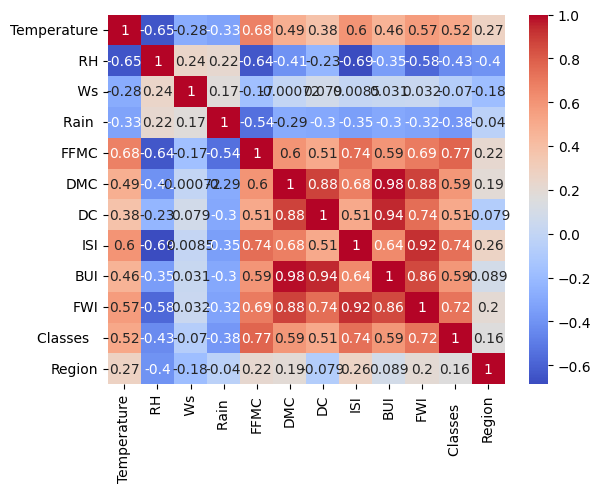

In [53]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()





In [65]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)


score =r2_score(y_test,y_pred)
print(score)
mae,mse,rmse

0.3963020478959759


(2.2495453131562133, 7.490782752637688, np.float64(2.736929438739276))

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))


In [69]:
pickle.dump(regressor,open('regressor.pkl','wb'))